# Visualizations

## Load data

In [1]:
#from matplotlib import pyplot as plt
#from matplotlib.lines import Line2D
import seaborn as sns
import pickle
import numpy as np
import pandas as pd


#%matplotlib inline
#sns.set()


datafolderviz = "/data/fanny.jourdan/TaCo_baseline/"

#modeltype = "RoBERTa"
modeltype = "DistilBERT"
#modeltype = "DeBERTa"

mlp_or_lin = "mlp"
Taco_SVD = "sSVD"
TaCo_PCA = "PCA" #None
TaCo_ICA = "ICA" #None 
num_components = 20

min_gender = 0.62679

#baseline1 = model train on BIOS (without debiasing method)
#baseline2 = model train on BIOS-neutral (without debiasing method)
if modeltype == "RoBERTa":
    acc_gender_baseline1 = 0.96013
    acc_occ_baseline1 = 0.8639
    acc_gender_baseline2 = 0.79798
    acc_occ_baseline2 = 0.8608
elif modeltype == "DistilBERT":
    acc_gender_baseline1 = 0.98385
    acc_occ_baseline1 = 0.8616
    acc_gender_baseline2 = 0.84357
    acc_occ_baseline2 = 0.8591
elif modeltype == "DeBERTa":
    acc_gender_baseline1 = 0.69671
    acc_occ_baseline1 = 0.8591
    acc_gender_baseline2 = 0.70569
    acc_occ_baseline2 = 0.8584

concept_removed = list(range(0,num_components))

In [3]:
nb_reps = 5
data_TaCo = datafolderviz + "TaCo/list_results/"

#list created with the run_concepts_remov.py file
l_acc_occ_Taco_SVD = pickle.load(open(data_TaCo + f'l_occupation_acc_{modeltype}_{Taco_SVD}{num_components}_{mlp_or_lin}_baseline_normal_{nb_reps}reps.pkl',"rb"))
l_acc_gender_Taco_SVD = pickle.load(open(data_TaCo + f'l_gender_acc_{modeltype}_{Taco_SVD}{num_components}_{mlp_or_lin}_baseline_normal_{nb_reps}reps.pkl',"rb"))
acc_occ_Taco_SVD = [acc_occ_baseline1] + [np.mean(sublist) for sublist in l_acc_occ_Taco_SVD]
acc_gender_Taco_SVD = [acc_gender_baseline1] + [np.mean(sublist) for sublist in l_acc_gender_Taco_SVD]

l_acc_occ_TaCo_PCA = pickle.load(open(data_TaCo + f'l_occupation_acc_{modeltype}_{TaCo_PCA}{num_components}_{mlp_or_lin}_baseline_normal_{nb_reps}reps.pkl',"rb"))
l_acc_gender_TaCo_PCA = pickle.load(open(data_TaCo + f'l_gender_acc_{modeltype}_{TaCo_PCA}{num_components}_{mlp_or_lin}_baseline_normal_{nb_reps}reps.pkl',"rb"))
acc_occ_TaCo_PCA = [acc_occ_baseline1] + [np.mean(sublist) for sublist in l_acc_occ_TaCo_PCA]
acc_gender_TaCo_PCA = [acc_gender_baseline1] + [np.mean(sublist) for sublist in l_acc_gender_TaCo_PCA]

l_acc_occ_TaCo_ICA = pickle.load(open(data_TaCo + f'l_occupation_acc_{modeltype}_{TaCo_ICA}{num_components}_{mlp_or_lin}_baseline_normal_{nb_reps}reps.pkl',"rb"))
l_acc_gender_TaCo_ICA = pickle.load(open(data_TaCo + f'l_gender_acc_{modeltype}_{TaCo_ICA}{num_components}_{mlp_or_lin}_baseline_normal_{nb_reps}reps.pkl',"rb"))
acc_occ_TaCo_ICA = [acc_occ_baseline1] + [np.mean(sublist) for sublist in l_acc_occ_TaCo_ICA]
acc_gender_TaCo_ICA = [acc_gender_baseline1] + [np.mean(sublist) for sublist in l_acc_gender_TaCo_ICA]

In [4]:
results_INLP = np.load(datafolderviz + f'INLP/results/results_occ_gen_clfs_{modeltype}_b_normal.npy', allow_pickle=True).item()

acc_occ_INLP = [acc_occ_baseline1] + results_INLP["l_acc_occ"]
acc_gender_INLP = [acc_gender_baseline1] + results_INLP["l_acc_gen"]
l_num_clfs_INLP = [0] + results_INLP["l_num_clfs"]


acc_occ_INLP_linear = [acc_occ_baseline1] + results_INLP["l_acc_occ_linear"]
acc_gender_INLP_linear = [acc_gender_baseline1] + results_INLP["l_acc_gen_linear"]

In [8]:
num_iters = 50000
epsilon = 0.001

results_RLACE = np.load(datafolderviz + f'RLACE/results/results_{num_iters}iters_{epsilon}epsilon_occ_gen_rank_{modeltype}_b_normal.npy', allow_pickle=True).item()
acc_occ_RLACE = [acc_occ_baseline1] + results_RLACE["l_acc_occ"]
acc_gender_RLACE = [acc_gender_baseline1] + results_RLACE["l_acc_gen"]
rank_RLACE = [0] + results_RLACE["rank"]

In [14]:
rank_RLACE

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [10]:
results_RLACE_alph = np.load(datafolderviz + f'RLACE/results/results_1rank_{num_iters}iters_occ_gen_epsilon_{modeltype}_b_normal.npy', allow_pickle=True).item()


In [11]:
results_RLACE_alph

{'l_acc_occ': [0.8562997441271393],
 'l_acc_gen': [0.9843261800367736],
 'epsilon': [0.0001]}

In [18]:
results_RLACE_alph

{'l_acc_occ': [0.8562997441271393],
 'l_acc_gen': [0.9843261800367736],
 'epsilon': [0.0001]}

In [7]:
acc_occ_LEACE = 0.85648
acc_gender_LEACE = 0.9837

## Formating data

In [8]:

# Define colors for the methods using a custom palette
method_colors = {
    'TaCo SVD': "#1f77b4",  # Blue
    'TaCo PCA': "#17becf",  # Cyan
    'TaCo ICA': "#9467bd",  # Purple
    'INLP': "#d62728",      # Red
    'RLACE': "#8c564b",  # Brown 
    'LEACE': '#ff1493',  # Deep Pink color
    'Bios neutral model': "#ff7f0e",  # Orange
    'Min Gender': "#2ca02c",  # Green
}


method_markers = {
    'TaCo SVD': None,
    'TaCo PCA': None,
    'TaCo ICA': None,
    'INLP': None,           
    'RLACE': None,
    'LEACE': '*',
    'Bios neutral model': '.',     
    # Add other methods as needed
}

# Prepare methods data
methods_data = {
    'TaCo SVD': {
        'Occupation Accuracy': acc_occ_Taco_SVD,
        'Gender Accuracy': acc_gender_Taco_SVD
    },
    'TaCo PCA': {
        'Occupation Accuracy': acc_occ_TaCo_PCA,
        'Gender Accuracy': acc_gender_TaCo_PCA
    },
    'TaCo ICA': {
        'Occupation Accuracy': acc_occ_TaCo_ICA,
        'Gender Accuracy': acc_gender_TaCo_ICA
    },
    'INLP': {
        'Occupation Accuracy': acc_occ_INLP,
        'Gender Accuracy': acc_gender_INLP
    },
    'RLACE': {
        'Occupation Accuracy': acc_occ_RLACE,
        'Gender Accuracy': acc_gender_RLACE
    },
}

# Baseline 1 data
baseline1_data = {
    'Occupation Accuracy': acc_occ_baseline1,   
    'Gender Accuracy': acc_gender_baseline1
}


additional_points = [
    {
        'Method': 'Bios neutral model',
        'Occupation Accuracy': acc_occ_baseline2,
        'Gender Accuracy': acc_gender_baseline2,
        'Occupation Accuracy Drop': (acc_occ_baseline1 - acc_occ_baseline2) / acc_occ_baseline1,
        'Gender Accuracy Drop': (acc_gender_baseline1 - acc_gender_baseline2) / acc_gender_baseline1,
    },
    {
        'Method': 'LEACE',
        'Occupation Accuracy': acc_occ_LEACE,
        'Gender Accuracy': acc_gender_LEACE,
        'Occupation Accuracy Drop': (acc_occ_baseline1 - acc_occ_LEACE) / acc_occ_baseline1,
        'Gender Accuracy Drop': (acc_gender_baseline1 - acc_gender_LEACE) / acc_gender_baseline1,
    }
]

## Plot data

In [9]:
from tools.visualization import prepare_data_drop, plot_accuracy_vs_accuracy_drop, prepare_accuracy_data, plot_accuracy

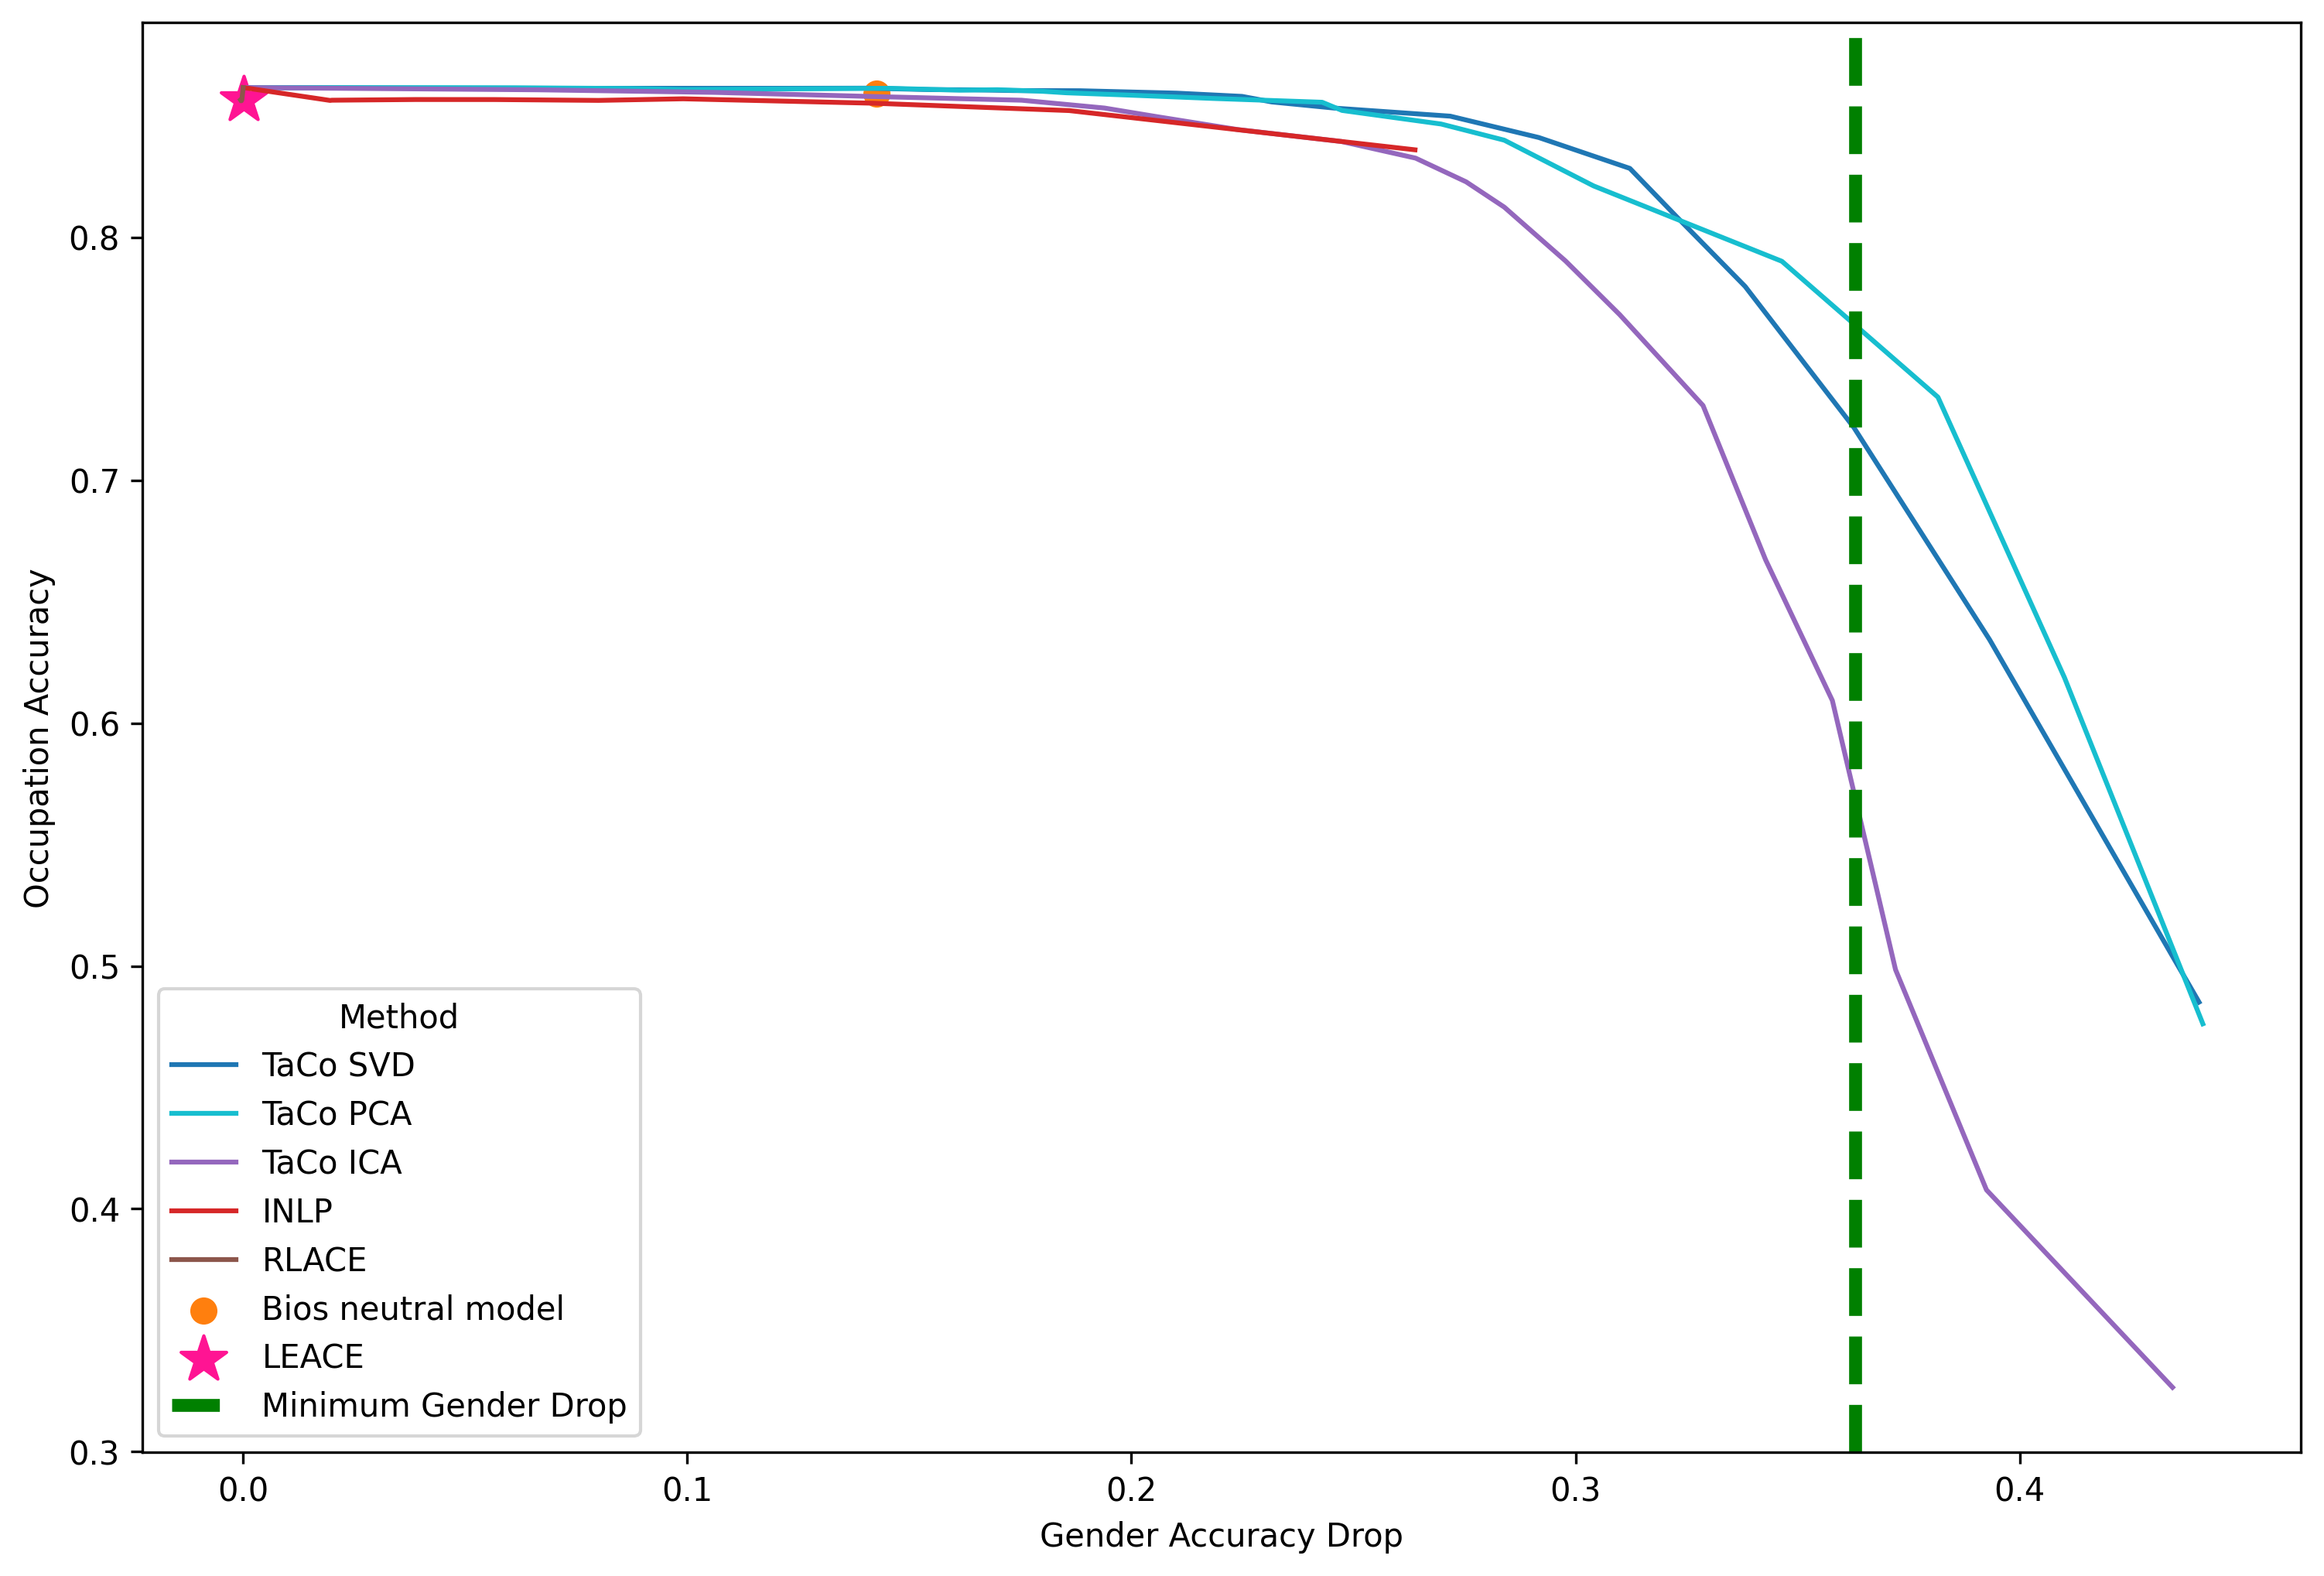

In [10]:
# Prepare data for accuracy drop plot
df_gender_drop = prepare_data_drop(methods_data, baseline1_data, drop_metric='Gender')

min_gender_drop = (acc_gender_baseline1 - min_gender) / acc_gender_baseline1

# Plot accuracy drop
#plot_occ_acc_vs_gender_acc_drop(df_gender_drop, baseline2_data, min_gender_drop, method_colors, method_markers, legend=True)


plot_accuracy_vs_accuracy_drop(
    x_col='Gender Accuracy Drop',
    y_col='Occupation Accuracy',
    df=df_gender_drop,
    additional_points=additional_points,
    method_colors=method_colors,
    method_markers=method_markers,
    legend=True,
    xlim=None,  # Adjust if needed
    ylim=None,  # Adjust if needed
    min_drop_line=min_gender_drop,  # Set to a value if applicable
    min_drop_label='Minimum Gender Drop'
)

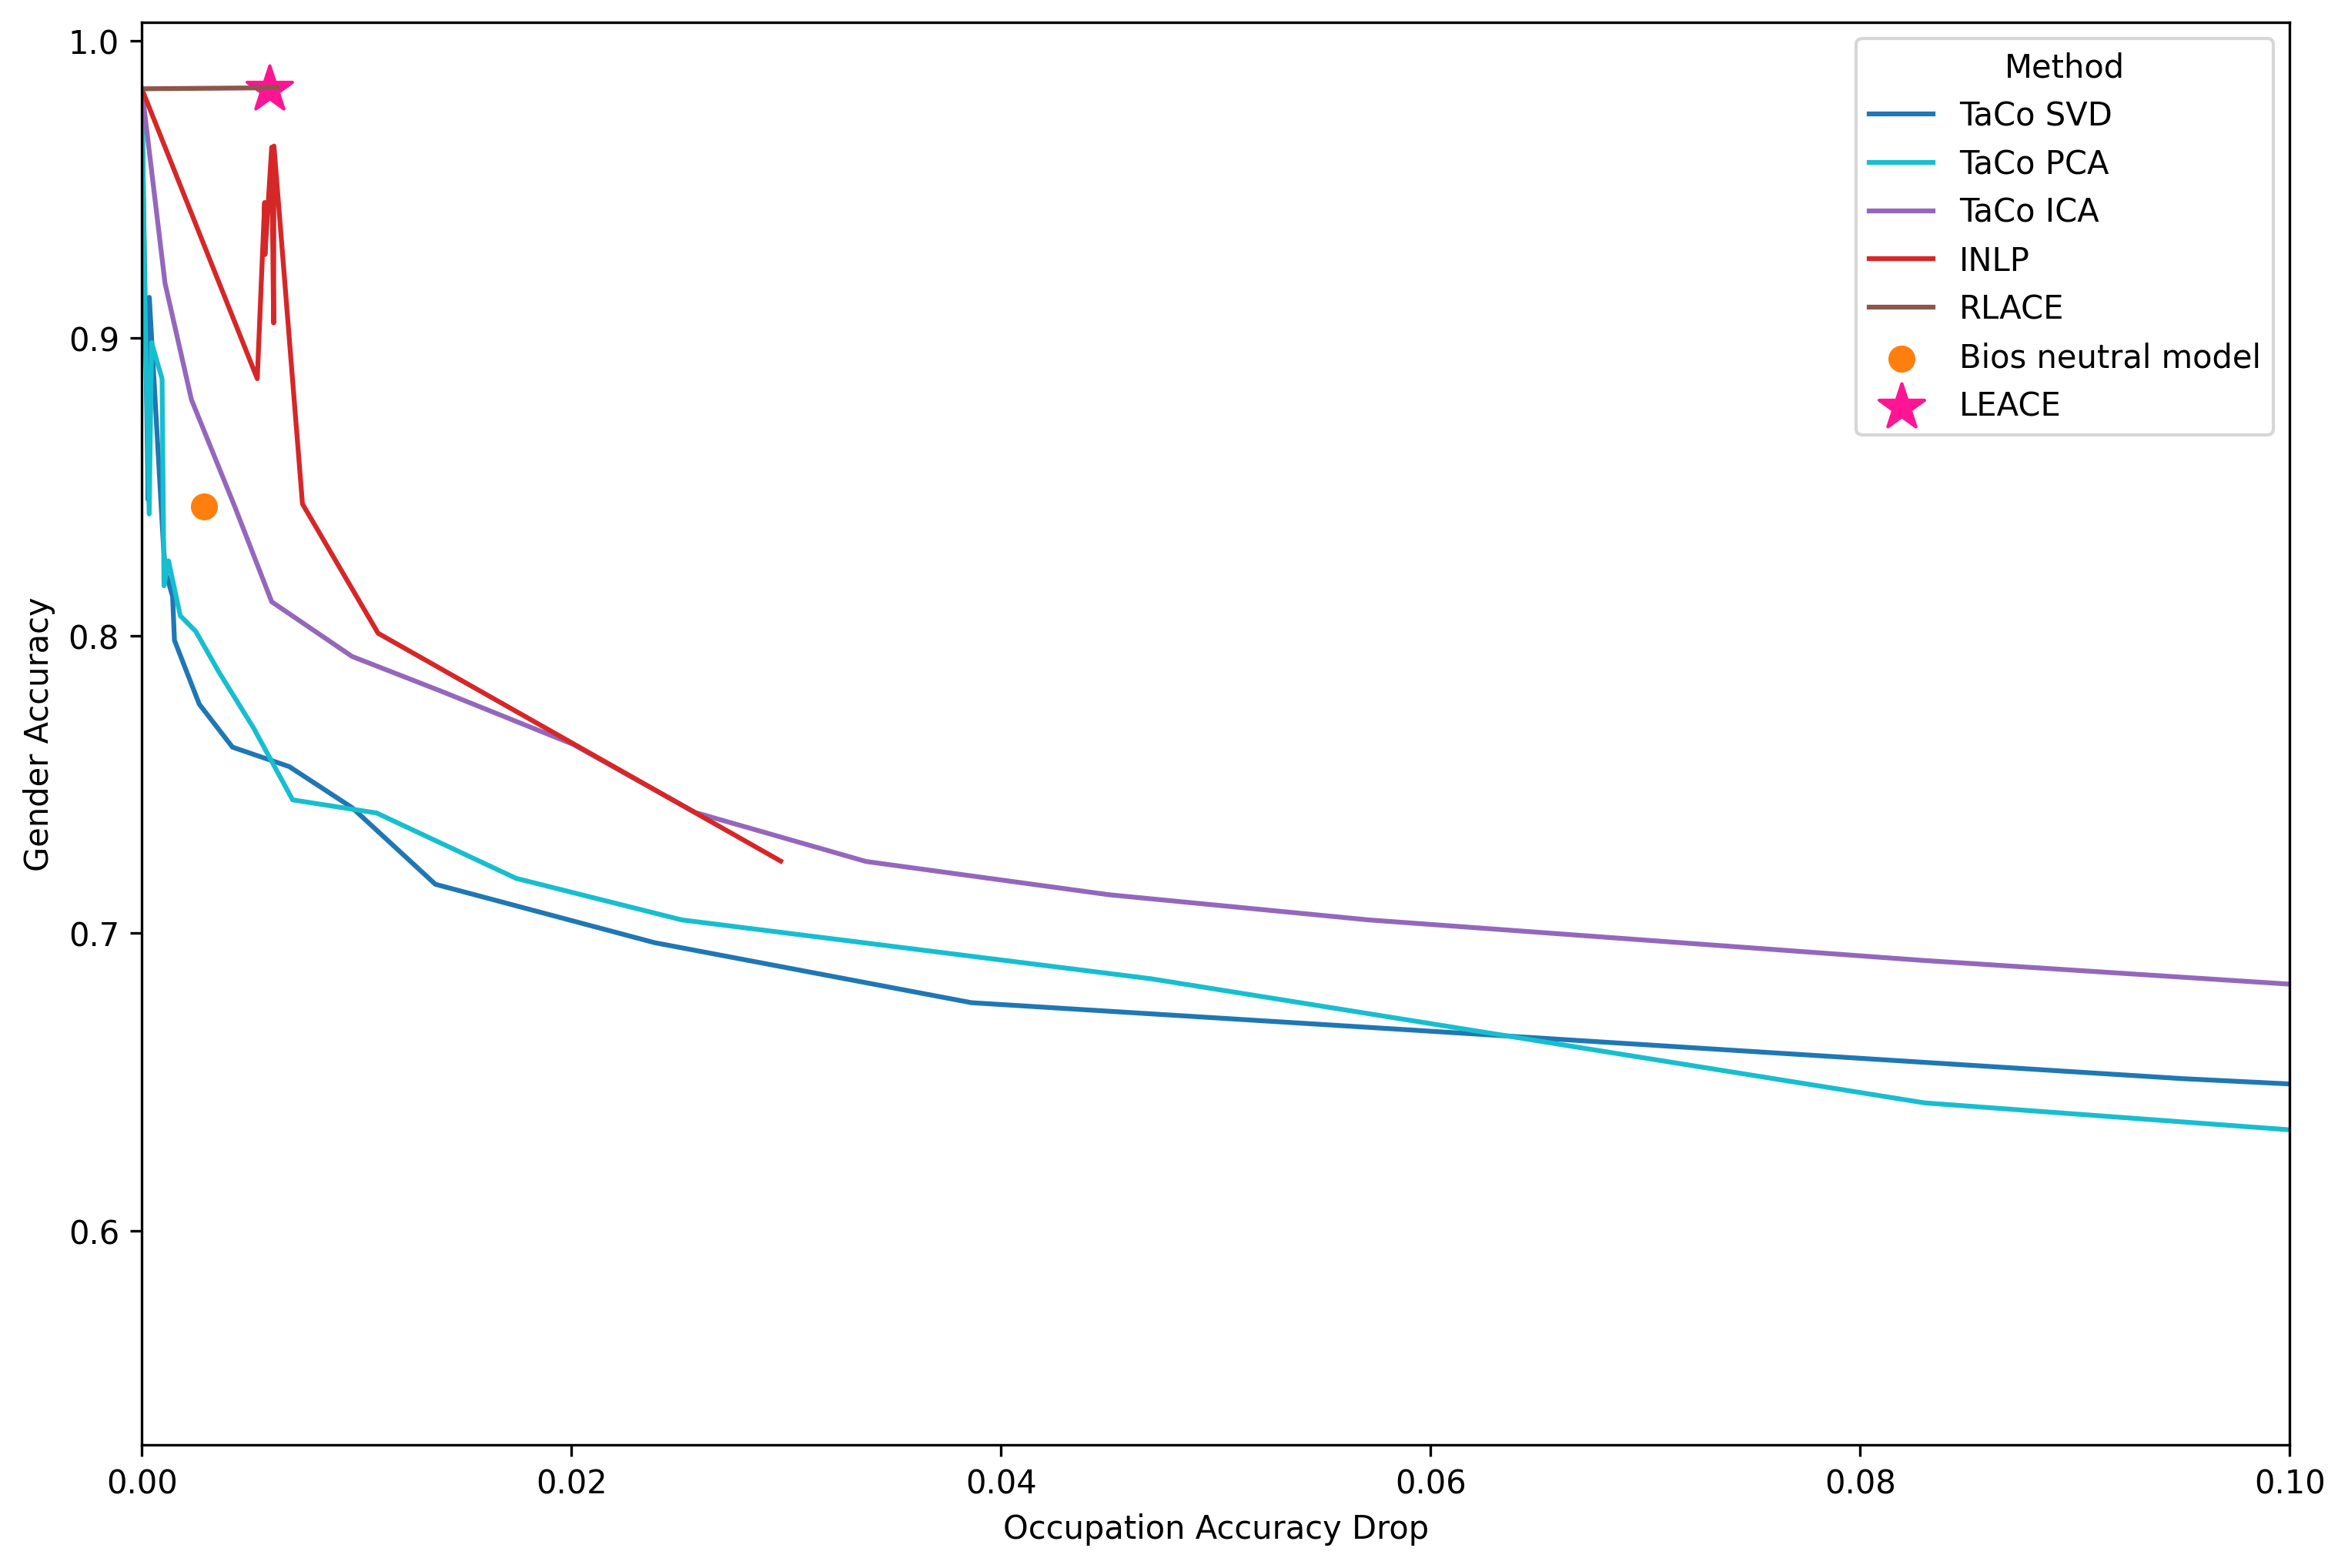

In [11]:
# Prepare data for accuracy drop plot
df_occ_drop = prepare_data_drop(methods_data, baseline1_data, drop_metric='Occupation')

# Filter the DataFrame
#df_occ_drop_filtered = df_occ_drop[df_occ_drop['Occupation Accuracy Drop'] < 0.1].copy()


plot_accuracy_vs_accuracy_drop(
    x_col='Occupation Accuracy Drop',
    y_col='Gender Accuracy',
    df=df_occ_drop,
    method_colors=method_colors,
    method_markers=method_markers,
    legend=True,
    xlim=(0, 0.1),
    additional_points=additional_points,
    min_drop_line=None,  # Set to a value if applicable
    min_drop_label='Minimum Occupation Drop'
)



# Plot accuracy drop
#plot_gender_acc_vs_occ_acc_drop(df_occ_drop_filtered, baseline2_data, min_occupation_drop=None,  # Set to a value if applicable
#                                method_colors=method_colors, method_markers=method_markers2, legend=True)

# Explanations

In [ ]:
import pickle
import numpy as np

global_importance_gender = pickle.load(open(f'global_importance/gi_gender_{modeltype}_{Taco_SVD}{num_components}_{mlp_or_lin}_baseline_normal.pkl',"rb"))
global_importance_occ = pickle.load(open(f'global_importance/gi_occupation_{modeltype}_{Taco_SVD}{num_components}_{mlp_or_lin}_baseline_normal.pkl',"rb"))

In [ ]:
angle = np.arctan(global_importance_occ / global_importance_gender) * 180 / np.pi

sentences_train = []

for k in range(len(dt_X_train)):
    sentences_train.append(dt_X_train[k][0])

gender_pred_train = torch.argmax(pg_model(train_features), -1)
label_pred_train = torch.argmax(model.end_model(train_features), -1)

sentences_train = np.array(sentences_train)
train_labels = np.array(train_labels)
label_pred_train = np.array(label_pred_train)
gender_train = np.array(gender_train)
gender_pred_train = np.array(gender_pred_train)

names_g = ['F', 'M']
names_occ = ['surgeon', 'pastor', 'photographer', 'professor', 'chiropractor', 'software_engineer', 'teacher', 'poet', 'dj', 'rapper', 'paralegal', 'physician', 
              'journalist', 'architect', 'attorney', 'yoga_teacher', 'nurse', 'painter', 'model', 'composer', 'personal_trainer','filmmaker', 'comedian', 'accountant', 
              'interior_designer', 'dentist', 'psychologist', 'dietitian']


In [ ]:
from TaCo.explaination import occlusion_concepts, viz_concepts, print_legend, print_legend2
import random

#sentences_type = "n bios for each concept"
#sentences_type = "random sentences"
sentences_type = "selected sentences"

if modeltype == "RoBERTa":
    l_concept_id = [15, 18, 19]
    colors = {0: "rgba(255, 102, 122, ",
              1: "rgba(179, 174, 54, ", 
              2: "rgba(45, 136, 179, "}
    
elif modeltype == "DistilBERT":
    l_concept_id = [13, 16, 17] 
    colors = {0: "rgba(91, 51, 255, ",
              1: "rgba(193, 51, 255, ", 
              2: "rgba(255, 51, 164, "}

angle = np.arctan(global_importance_occ / global_importance_gender) * 180 / np.pi
sorted_indices = sorted(range(len(angle)), key=lambda i: angle[i], reverse=False)
conceptnames = [sorted_indices.index(i) + 1 for i in l_concept_id]


if sentences_type == "n bios for each concept":
    n = 2 #number of bios for each concepts
    l_mip_ids, l_mip_sentences, l_mip_label, l_mip_predict_label, l_mip_gender, l_mip_predict_gender = [], [], [], [], [], []
    for concept_id in l_concept_id:
        mip_ids = np.argsort(U_train[:, concept_id].numpy())[::-1][:n]
        l_mip_ids.extend(mip_ids)
        l_mip_sentences.extend(sentences_train[mip_ids])
        l_mip_label.extend(train_labels[mip_ids])
        l_mip_predict_label.extend(label_pred_train[mip_ids])
        l_mip_gender.extend(gender_train[mip_ids])
        l_mip_predict_gender.extend(gender_pred_train[mip_ids])


else:
    if sentences_type == "selected sentences":
        if modeltype == "RoBERTa":
            l_mip_ids = [230484, 7029, 155554, 94984, 82706, 254362, 205272, 226245, 81814, 227333, 90373, 82798, 143102, 261617, 
                          219844, 125561, 39863, 246224, 265371, 155464, 123403, 229367]
        elif modeltype == "DistilBERT":
            l_mip_ids = [142293, 96384, 163939, 234490, 172463, 126052, 171392, 5941, 78211, 19448, 25222, 117517,
                         110738, 36185, 60128, 138762]
    
    elif sentences_type == "random sentences":
        l_mip_ids = random.sample(range(len(sentences_train)), 200)

    l_mip_sentences = sentences_train[l_mip_ids]
    l_mip_label = train_labels[l_mip_ids]
    l_mip_predict_label = label_pred_train[l_mip_ids]
    l_mip_gender = gender_train[l_mip_ids]
    l_mip_predict_gender = gender_pred_train[l_mip_ids]

In [ ]:
extract_fct, l_ignore_words = "word", ["’", "'", ",", ".", "...", "..", "....", ":", "!", "?", "", " ", "(", ")"]
#extract_fct, l_ignore_words = "clause", []

print("gender importance / occupation importance")
print_legend2(colors, l_concept_id, global_importance_gender, global_importance_occ, conceptnames)
#colors = print_legend(l_concept_id, global_importance_gender, global_importance_occ, conceptnames)

i = 0
for sentence in l_mip_sentences:
  print('sentence:', l_mip_ids[i])
  print('occupation: true label:', names_occ[int(l_mip_label[i])], '; predicted label:', names_occ[int(l_mip_predict_label[i])])
  print('gender: true label:', names_g[l_mip_gender[i]], '; predicted label:', names_g[l_mip_predict_gender[i]])

  phi = occlusion_concepts(sentence, model, tokenizer, W, l_concept_id, ignore_words = l_ignore_words, extract_fct = extract_fct, device = device)
  
  phi /= np.max(np.abs(phi)) + 1e-5
  viz_concepts(sentence, phi, colors, ignore_words = l_ignore_words, extract_fct = extract_fct)
  i += 1

gender importance / occupation importance


sentence: 142293
occupation: true label: surgeon ; predicted label: surgeon
gender: true label: M ; predicted label: M


sentence: 96384
occupation: true label: surgeon ; predicted label: surgeon
gender: true label: M ; predicted label: M


sentence: 163939
occupation: true label: dentist ; predicted label: dentist
gender: true label: M ; predicted label: M


sentence: 234490
occupation: true label: physician ; predicted label: physician
gender: true label: F ; predicted label: F


sentence: 172463
occupation: true label: surgeon ; predicted label: surgeon
gender: true label: M ; predicted label: M


sentence: 126052
occupation: true label: photographer ; predicted label: photographer
gender: true label: M ; predicted label: M


sentence: 171392
occupation: true label: professor ; predicted label: professor
gender: true label: M ; predicted label: M


sentence: 5941
occupation: true label: professor ; predicted label: professor
gender: true label: F ; predicted label: F


sentence: 78211
occupation: true label: journalist ; predicted label: journalist
gender: true label: F ; predicted label: F


sentence: 19448
occupation: true label: photographer ; predicted label: photographer
gender: true label: M ; predicted label: M


sentence: 25222
occupation: true label: professor ; predicted label: professor
gender: true label: F ; predicted label: F


sentence: 117517
occupation: true label: professor ; predicted label: professor
gender: true label: M ; predicted label: M


sentence: 110738
occupation: true label: surgeon ; predicted label: attorney
gender: true label: M ; predicted label: M


sentence: 36185
occupation: true label: professor ; predicted label: professor
gender: true label: M ; predicted label: M


sentence: 60128
occupation: true label: composer ; predicted label: composer
gender: true label: M ; predicted label: M


sentence: 138762
occupation: true label: nurse ; predicted label: nurse
gender: true label: F ; predicted label: F
